## Inicialização

In [ ]:
!pip install control slycot

     |████████████████████████████████| 339 kB 5.1 MB/s 
     |████████████████████████████████| 1.5 MB 40.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344928 sha256=a4b7b8b0b3ac6ef2ed03b500e1d139af302e0e803061858ecbc993457ea701bf
  Stored in directory: /root/.cache/pip/wheels/5b/64/54/70faad181d7baff1184541ca00c9a2efa633acd0a811831d30
  Created wheel for slycot: filename=slycot-0.4.0-cp37-cp37m-linux_x86_64.whl size=1417933 sha256=10ddbae6ce05cdb791bcec2825bc919eb791667a5c82c7e208f029c6fe165f8c
  Stored in directory: /root/.cache/pip/wheels/fa/b2/19/1e6568896fbabaf2a03d2fb6575211d281afcb9e00ce026cf6
Successfully built control slycot


In [ ]:
import numpy as np
import pandas as pd
import control as ct

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

from IPython.display import display, display_latex


def display_system(sys, label='', post=''):
    display_latex(
        r'$$\displaystyle ' f'{label} {sys._repr_latex_()[2:-2]} {post}' r'$$',
        raw=True,
    )

def display_raw_latex(latex):
    display_latex(r'$$\displaystyle ' f'{latex}' r'$$', raw=True)

# **Situação inicial:**

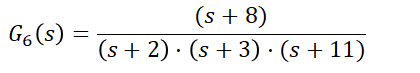

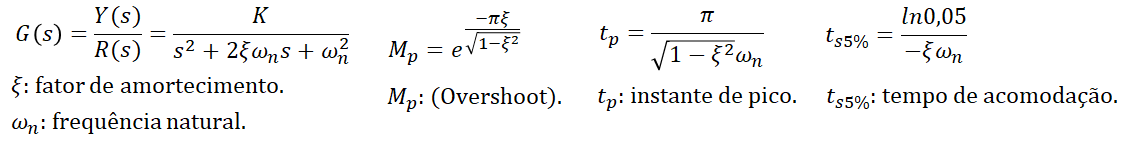

Polos:  [-3.35123042+13.39087214j -3.35123042-13.39087214j
 -8.51093636 +0.j         -0.9866028  +0.j        ]


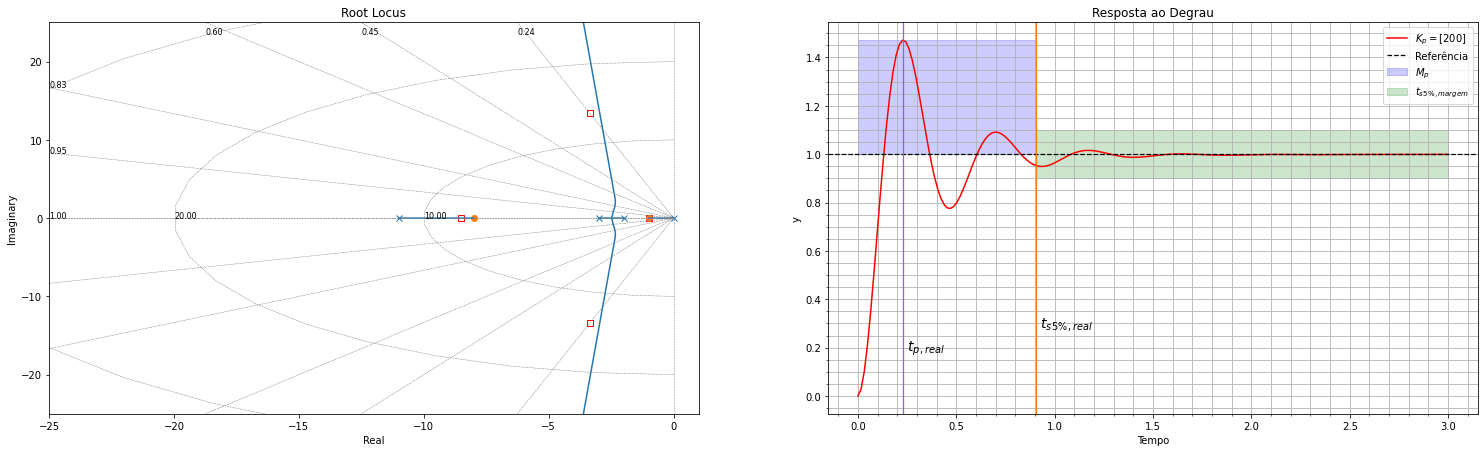

In [ ]:
s = ct.tf('s')
g = (s + 8) / (s + 2) / (s + 3) / (s + 11)

kp = 200
Ti = 1
Td = 0.001
ts5_margem =0.2
t_max = 3
g_pid = (1 + (1 / (Ti * s)) + Td * s) * g

fig = plt.figure(figsize=(4 * 6.4, 1.5 * 4.8))
ax = fig.add_subplot(1, 2, 1)
ct.root_locus(g_pid, xlim=(-25, 1), ylim=(-25, 25))
polos, kp = ct.root_locus(g_pid, np.array([kp]), plot=False)
ax.scatter(np.real(polos.T), np.imag(polos.T), marker='s', facecolor='none', edgecolors='red')

ax = fig.add_subplot(1, 2, 2)
g_mf = (kp * g_pid).feedback(1)
display_system(g_mf, label='G_{mf}(s) = ' )
print()
t, y = ct.step_response(g_mf, t_max)    
ax.plot(t, y, color='red', label=r'$K_p=' f'{kp}' r'$')

# np.max(y) retorna o valor máximo de y
Mp_real = np.max(y) / g_mf.dcgain() - 1 
# np.argmax(y) retorna o indice do valor máximo de y
tp_real = t[np.argmax(y)] 

xi = np.log(1 / Mp_real) / np.sqrt(np.pi ** 2 + (np.log(1 / Mp_real)) ** 2)
wn = np.pi / (tp_real * np.sqrt(1 - xi ** 2))
ts5_real = -np.log(0.05) / (xi * wn)

display_raw_latex(
    r'{M_{p,real}} = ' f'{Mp_real * 100:.2f}' r'\hspace{2pt} {\%} '  
    r'\hspace{15pt} {t_{p,real}} = ' f'{tp_real:.2f}' r'\hspace{2pt} {s} '
    r'\hspace{15pt} {t_{s}}_{5\%,real} = ' f'{ts5_real:.2f}' r'\hspace{2pt} {s} '
    r'\hspace{15pt} {t_{s}}_{5\%,margem} = ' f'{ts5_margem * 100:.2f}' r'\hspace{2pt} {\%} ' 
)
print('Polos: ', g_mf.pole())

ax.axhline(1, ls='--', lw=1.25, color="black", label='Referência')
ax.axvline(tp_real, ls='-', lw=1.25, color="C4")
ax.text(tp_real, 0.2, r' ${t_{p, real}}$', ha='left', va='center', fontsize=14)

y_final = g_mf.dcgain()
ax.add_patch(Rectangle(xy=(0, y_final), width=ts5_real, height=y_final * Mp_real,
    color='blue', alpha=0.2, label=r'$M_{p}$',
))
ax.add_patch(Rectangle(xy=(ts5_real, (1-ts5_margem/2) * y_final), width=t_max - ts5_real,
    height=ts5_margem * y_final, color='green', alpha=0.2, label=r'${t_s}_{5\%, margem}$',
))
ax.axvline(ts5_real, ls='-', lw=1.25, color="C1")
ax.text(ts5_real, 0.3, r' ${t_s}_{5\%, real}$', ha='left', va='center', fontsize=14)

ax.minorticks_on()
ax.legend()
ax.grid(which='both')
ax.set_xlabel('Tempo')
ax.set_ylabel('y')
ax.set_title('Resposta ao Degrau')

None

# **Exercício proposto:**

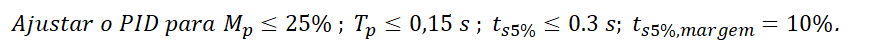

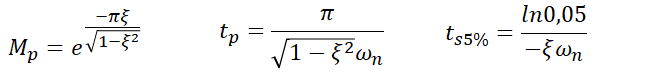

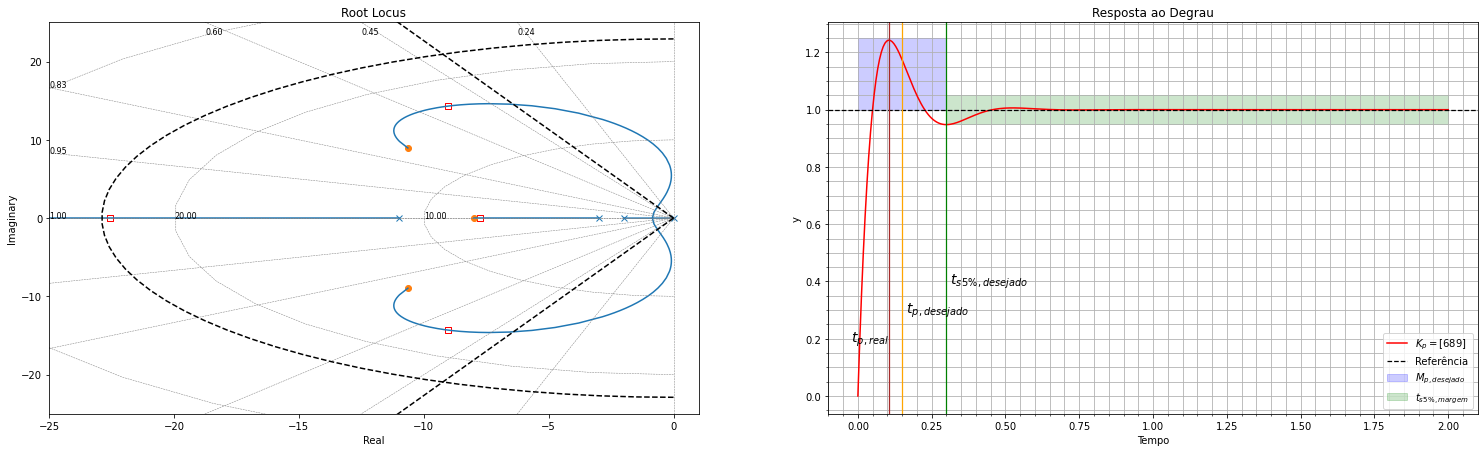

In [ ]:
s = ct.tf('s')
g = (s + 8) / (s + 2) / (s + 3) / (s + 11)

kp = 689    #Ganho Proporcioanl
Ti = 0.11    #Tempo de Integração
Td = 0.047  #Tempo de Derivação
g_pid = (1 + (1 / (Ti * s)) + Td * s) * g

fig = plt.figure(figsize=(4 * 6.4, 1.5 * 4.8))
ax = fig.add_subplot(1, 2, 1)
ct.root_locus(g_pid, xlim=(-25, 1), ylim=(-25, 25))

Mp_desejado = 0.25
tp_desejado = 0.15
ts5_desejado = 0.3
ts5_margem = 0.1
t_max = 2

xi_calculado = 0.4037127519   # COLOQUE AQUI O Xi CALCULADO

ax.plot([0, -100], [0, -100 * np.tan(np.arccos(xi_calculado))], ls='--', color='black')
ax.plot([0, -100], [0, 100 * np.tan(np.arccos(xi_calculado))], ls='--', color='black')

wn_calculado = 22.89242131    # COLOQUE AQUI O Wn CALCULADO

theta = np.linspace(-np.pi / 2, np.pi / 2)
ax.plot(wn_calculado * -np.cos(theta), wn_calculado * np.sin(theta), ls='--', color='black')

display_raw_latex(
    r'{M_{p,desejado}} = ' f'{Mp_desejado * 100:.2f}' r'\hspace{2pt} {\%} '   
    r'\hspace{12pt} {t_{p,desejado}} = ' f'{tp_desejado:.2f}' r'\hspace{2pt} {s} '
    r'\hspace{12pt} {t_{s}}_{5\%,desejado} = ' f'{ts5_desejado:.2f}' r'\hspace{2pt} {s} '
    r'\hspace{12pt} {t_{s}}_{5\%,margem} = ' f'{ts5_margem * 100:.2f}' r'\hspace{2pt} {\%} ' 
    r'\hspace{12pt} {\xi_{calculado}} = ' f'{xi_calculado:.3f}'
    r'\hspace{12pt} {\omega_{n, calculado}} = ' f'{wn_calculado:.3f}'
)

polos, kp = ct.root_locus(g_pid, np.array([kp]), plot=False)
ax.scatter(np.real(polos.T), np.imag(polos.T), marker='s', facecolor='none', edgecolors='red')

ax = fig.add_subplot(1, 2, 2)
g_mf = (kp * g_pid).feedback(1)

t, y = ct.step_response(g_mf, t_max)    
ax.plot(t, y, color='red', label=r'$K_p=' f'{kp}' r'$')

# np.max(y) retorna o valor máximo de y
Mp_real = np.max(y) / g_mf.dcgain() - 1 
# np.argmax(y) retorna o indice do valor máximo de y
tp_real = t[np.argmax(y)] 
xi_real = np.log(1 / Mp_real) / np.sqrt(np.pi ** 2 + (np.log(1 / Mp_real)) ** 2)
wn_real = np.pi / (tp_real * np.sqrt(1 - xi ** 2))

display_raw_latex(
    r'{M_{p,real}} = ' f'{Mp_real * 100:.2f}' r'\hspace{2pt} {\%} '  
    r'\hspace{12pt} {t_{p,real}} = ' f'{tp_real:.2f}' r'\hspace{2pt} {s} '
    r'\hspace{12pt} {\xi_{real}} = ' f'{xi_real:.3f}'
    r'\hspace{12pt} {\omega_{n, real}} = ' f'{wn_real:.3f}'
)

ax.axhline(1, ls='--', lw=1.25, color="black", label='Referência')
ax.axvline(tp_desejado, ls='-', lw=1.25, color="orange")
ax.text(tp_desejado, 0.3, r' ${ t_{p,desejado}}$', ha='left', va='center', fontsize=14)
ax.axvline(tp_real, ls='-', lw=1.25, color="brown")
ax.text(tp_real, 0.2, r' ${ t_{p,real}}$', ha='right', va='center', fontsize=14)


y_final = g_mf.dcgain()
ax.add_patch(Rectangle(xy=(0, y_final), width=ts5_desejado, height=y_final * Mp_desejado,
    color='blue', alpha=0.2, label=r'$M_{p, desejado}$',
))
ax.add_patch(Rectangle(xy=(ts5_desejado, (1-ts5_margem/2) * y_final), width=t_max - ts5_desejado,
    height=ts5_margem * y_final, color='green', alpha=0.2, label=r'${t_s}_{5\%, margem}$',
))
ax.axvline(ts5_desejado, ls='-', lw=1.25, color="green")
ax.text(ts5_desejado, 0.4, r' ${t_s}_{5\%, desejado}$', ha='left', va='center', fontsize=14)

ax.minorticks_on()
ax.legend()
ax.grid(which='both')
ax.set_xlabel('Tempo')
ax.set_ylabel('y')
ax.set_title('Resposta ao Degrau')
None

## Controle Proporcional Integrativo Derivativo - PID - Digital

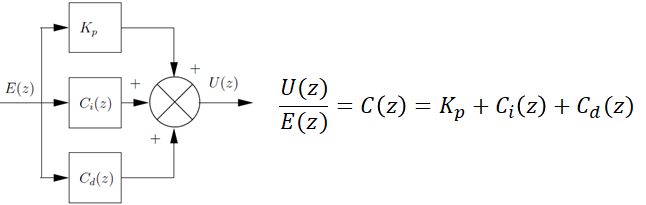

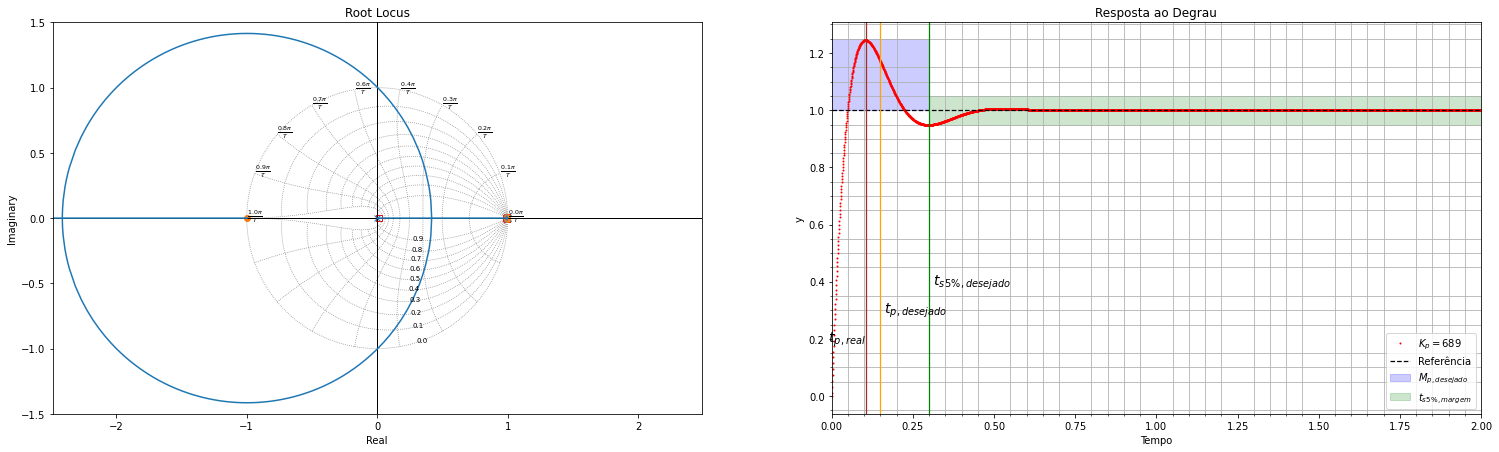

In [ ]:
s = ct.tf('s')
g = (s + 8) / (s + 2) / (s + 3) / (s + 11)
display_system(g, label='G(s) = ')
print()

T = 0.00065  #Tempo de Amostragem
z = ct.tf('z', dt=T)
gd = g.sample(T, method='zoh')
display_system(gd, label='G_d(z) = ')
print()

kp = np.array([689]) #Ganho Proporcional
Ti = 0.11    #Tempo de integração
Td = 0.047  #Tempo de derivação
gd_pid = (1 + T / (Ti * (1 - z ** -1)) + Td * (1 - z ** -1) / T) * gd

fig = plt.figure(figsize=(4 * 6.4, 1.5 * 4.8))
ax = fig.add_subplot(1, 2, 1)
ct.root_locus(gd_pid)
ax.set_xlim((-1.5, 1.5))
ax.set_ylim((-1.5, 1.5))

colors = ['red']
markers = ['o']
polos, kp = ct.root_locus(gd_pid, kp, plot=False)
ax.scatter(np.real(polos.T), np.imag(polos.T), marker='s', facecolor='none', edgecolors=colors)

ax = fig.add_subplot(1, 2, 2)
for kp_, color, marker in zip(kp, colors, markers):
    gd_mf = (kp_ * gd_pid).feedback(1)
    t, y = ct.step_response(gd_mf)
    ax.plot(t, y, ls='none', marker=marker, markersize=1, color=color, label=r'$K_p=' f'{kp_}' r'$')
    #ax.plot(t, y, ls='none', marker=marker, markersize=3, color=color, label=r'$K_p=' f'{kp_}' r'$')

# np.max(y) retorna o valor máximo de y
Mp_real = np.max(y) / gd_mf.dcgain() - 1 
# np.argmax(y) retorna o indice do valor máximo de y
tp_real = t[np.argmax(y)] 

display_raw_latex(
    r'{M_{p,real}} = ' f'{Mp_real * 100:.2f}' r'\hspace{2pt} {\%} '  
    r'\hspace{15pt} {t_{p,real}} = ' f'{tp_real:.2f}'  r'\hspace{2pt} {s} '
)

ax.axhline(1, ls='--', lw=1.25, color="black", label='Referência')
ax.axvline(tp_desejado, ls='-', lw=1.25, color="orange")
ax.text(tp_desejado, 0.3, r' ${ t_{p,desejado}}$', ha='left', va='center', fontsize=14)
ax.axvline(tp_real, ls='-', lw=1.25, color="brown")
ax.text(tp_real, 0.2, r' ${ t_{p,real}}$', ha='right', va='center', fontsize=14)

y_final = g_mf.dcgain()
ax.add_patch(Rectangle(xy=(0, y_final), width=ts5_desejado, height=y_final * Mp_desejado,
    color='blue', alpha=0.2, label=r'$M_{p, desejado}$',
))
ax.add_patch(Rectangle(xy=(ts5_desejado, 0.95 * y_final), width=t_max - ts5_desejado,
    height=0.1 * y_final, color='green', alpha=0.2, label=r'${t_s}_{5\%, margem}$',
))
ax.axvline(ts5_desejado, ls='-', lw=1.25, color="green")
ax.text(ts5_desejado, 0.4, r' ${t_s}_{5\%, desejado}$', ha='left', va='center', fontsize=14)

ax.minorticks_on()
ax.legend()
ax.grid(which='both')
ax.grid()
ax.set_xlabel('Tempo')
ax.set_ylabel('y')
ax.set_title('Resposta ao Degrau')
ax.set_xlim(0, 2)

None